<a href="https://colab.research.google.com/github/ahmedabouelhassan99/machine-learning-project/blob/main/ahmedml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' The project focuses on understanding the type of cancer in United states
and its medications available. To identify the impact of the medications and the cancer
 types we do not need any specific models to draw conclusions.
  We would be using the No free lunch
  theorem where just the linear graph between the two columns would be shown to just identify the column dependencies on each other as well as
   find out the linear regression affecting the dependencies.'''
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
canceranalyis_df = pd.read_csv("canceranalyis_database.csv")
canceranalyis_df.head()


,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Reading the data from the file
canceranalyis_df.head()

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#describing the tables
canceranalyis_df.describe()

,length,subTypes,oncoTreeLevel,appeared,pubChem,domainName_registered,twitter_followers,usNewsRank,facebook_followers,uscsCasesPerYear,...,ein,youTubeChannel_followers,instagram_followers,linkedin_followers,closed,pinterest_followers,vimeo_followers,telegram_followers,rumble_followers,gab_followers
count,1453.000000,854.000000,854.000000,130.000000,8.700000e+01,74.000000,6.200000e+01,46.000000,2.600000e+01,25.000000,...,1.600000e+01,15.000000,15.000000,1.200000e+01,2.000000,2.000000,1.0,1.0,1.0,1.0
mean,11.044735,2.152225,3.152225,1983.161538,2.631455e+06,2002.256757,2.081537e+05,23.521739,1.874490e+05,64217.400000,...,3.851916e+08,20732.933333,55672.066667,3.919902e+05,2013.500000,1200.000000,164.0,38197.0,7700.0,406.0
std,3.132089,10.019220,1.144952,38.162201,8.061799e+06,8.142668,7.543082e+05,13.642644,5.607620e+05,72765.400444,...,2.996359e+08,43760.388296,140794.994310,8.640805e+05,13.435029,141.421356,NaN,NaN,NaN,NaN
min,3.000000,0.000000,1.000000,1771.000000,1.071000e+03,1988.000000,3.000000e+00,1.000000,1.100000e+02,54.000000,...,4.226304e+07,56.000000,13.000000,1.850000e+02,2004.000000,1100.000000,164.0,38197.0,7700.0,406.0
25%,10.000000,0.000000,2.000000,1967.250000,5.352500e+03,1996.000000,4.690000e+03,12.250000,3.025000e+03,18872.000000,...,1.326915e+08,392.500000,1378.500000,8.130000e+02,2008.750000,1150.000000,164.0,38197.0,7700.0,406.0
50%,12.000000,0.000000,3.000000,1990.500000,6.083800e+04,1999.000000,1.415000e+04,23.500000,9.800000e+03,45272.000000,...,2.351195e+08,2390.000000,4909.000000,6.924500e+03,2013.500000,1200.000000,164.0,38197.0,7700.0,406.0
75%,12.000000,0.000000,4.000000,2011.000000,4.529610e+05,2009.750000,7.572500e+04,34.500000,7.167625e+04,71565.000000,...,5.765923e+08,13305.000000,34400.000000,1.726428e+05,2018.250000,1250.000000,164.0,38197.0,7700.0,406.0
max,28.000000,120.000000,6.000000,2023.000000,5.467007e+07,2020.000000,5.400000e+06,48.000000,2.700000e+06,264115.000000,...,9.541639e+08,165000.000000,552000.000000,2.897584e+06,2023.000000,1300.000000,164.0,38197.0,7700.0,406.0


In [8]:
#deleting unnecessary colums
canceranalyis_df = canceranalyis_df.drop(['length', 'wikipedia', 'website', 'twitter', 'reference', 'standsFor', 'phoneNumber', 'facebook', 'domainName_registered', 'kegg', 'nciDesignation', 'nciImage', 'nciLink', 'linkedin', 'tradenames', 'twitter_followers', 'instagram', 'usNewsRank', 'parentOrganization', 'hostSchool', 'youTubeChannel', 'aka', 'author', 'facebook_followers', 'gco', 'amazon', 'ein', 'youTubeChannel_followers', 'instagram_followers', 'subreddit_members', 'subreddit',  'charityNavigator', 'linkedin_followers', 'nyse', 'pinterest', 'nasdaq', 'related', 'greatNonProfits', 'guideStar', 'oldName', 'company', 'youTube', 'isOpenSource', 'closed', 'originCommunity', 'members', 'pdf', 'githubRepo', 'pinterest_followers', 'investorRelationsPage', 'englandAndWalesCharityDetails', 'isPublicDomain', 'journal', 'nextDate', 'publicationFrequency', 'wolframAlpha', 'eventsPage', 'github', 'vimeo_followers', 'vimeo', 'telegram_followers', 'telegram', 'rumble_followers', 'rumble', 'gab_followers', 'gab', 'coursera', 'reference', 'standsFor', 'phoneNumber', 'facebook', 'domainName_registered', 'kegg', 'nciDesignation', 'nciImage', 'nciLink', 'linkedin', 'tradenames', 'twitter_followers', 'instagram', 'usNewsRank', 'parentOrganization', 'hostSchool', 'youTubeChannel', 'aka', 'author', 'facebook_followers', 'gco', 'amazon', 'ein', 'youTubeChannel_followers', 'instagram_followers', 'subreddit_members', 'subreddit', 'charityNavigator', 'linkedin_followers', 'nyse', 'pinterest', 'nasdaq', 'related', 'greatNonProfits', 'guideStar', 'oldName', 'company', 'youTube', 'isOpenSource', 'closed', 'originCommunity', 'members', 'pdf', 'githubRepo', 'pinterest_followers', 'investorRelationsPage', 'englandAndWalesCharityDetails', 'isPublicDomain', 'journal', 'nextDate', 'publicationFrequency', 'wolframAlpha', 'eventsPage', 'github', 'vimeo_followers', 'vimeo', 'telegram_followers', 'telegram', 'rumble_followers', 'rumble', 'gab_followers', 'gab', 'coursera'], axis = 1)

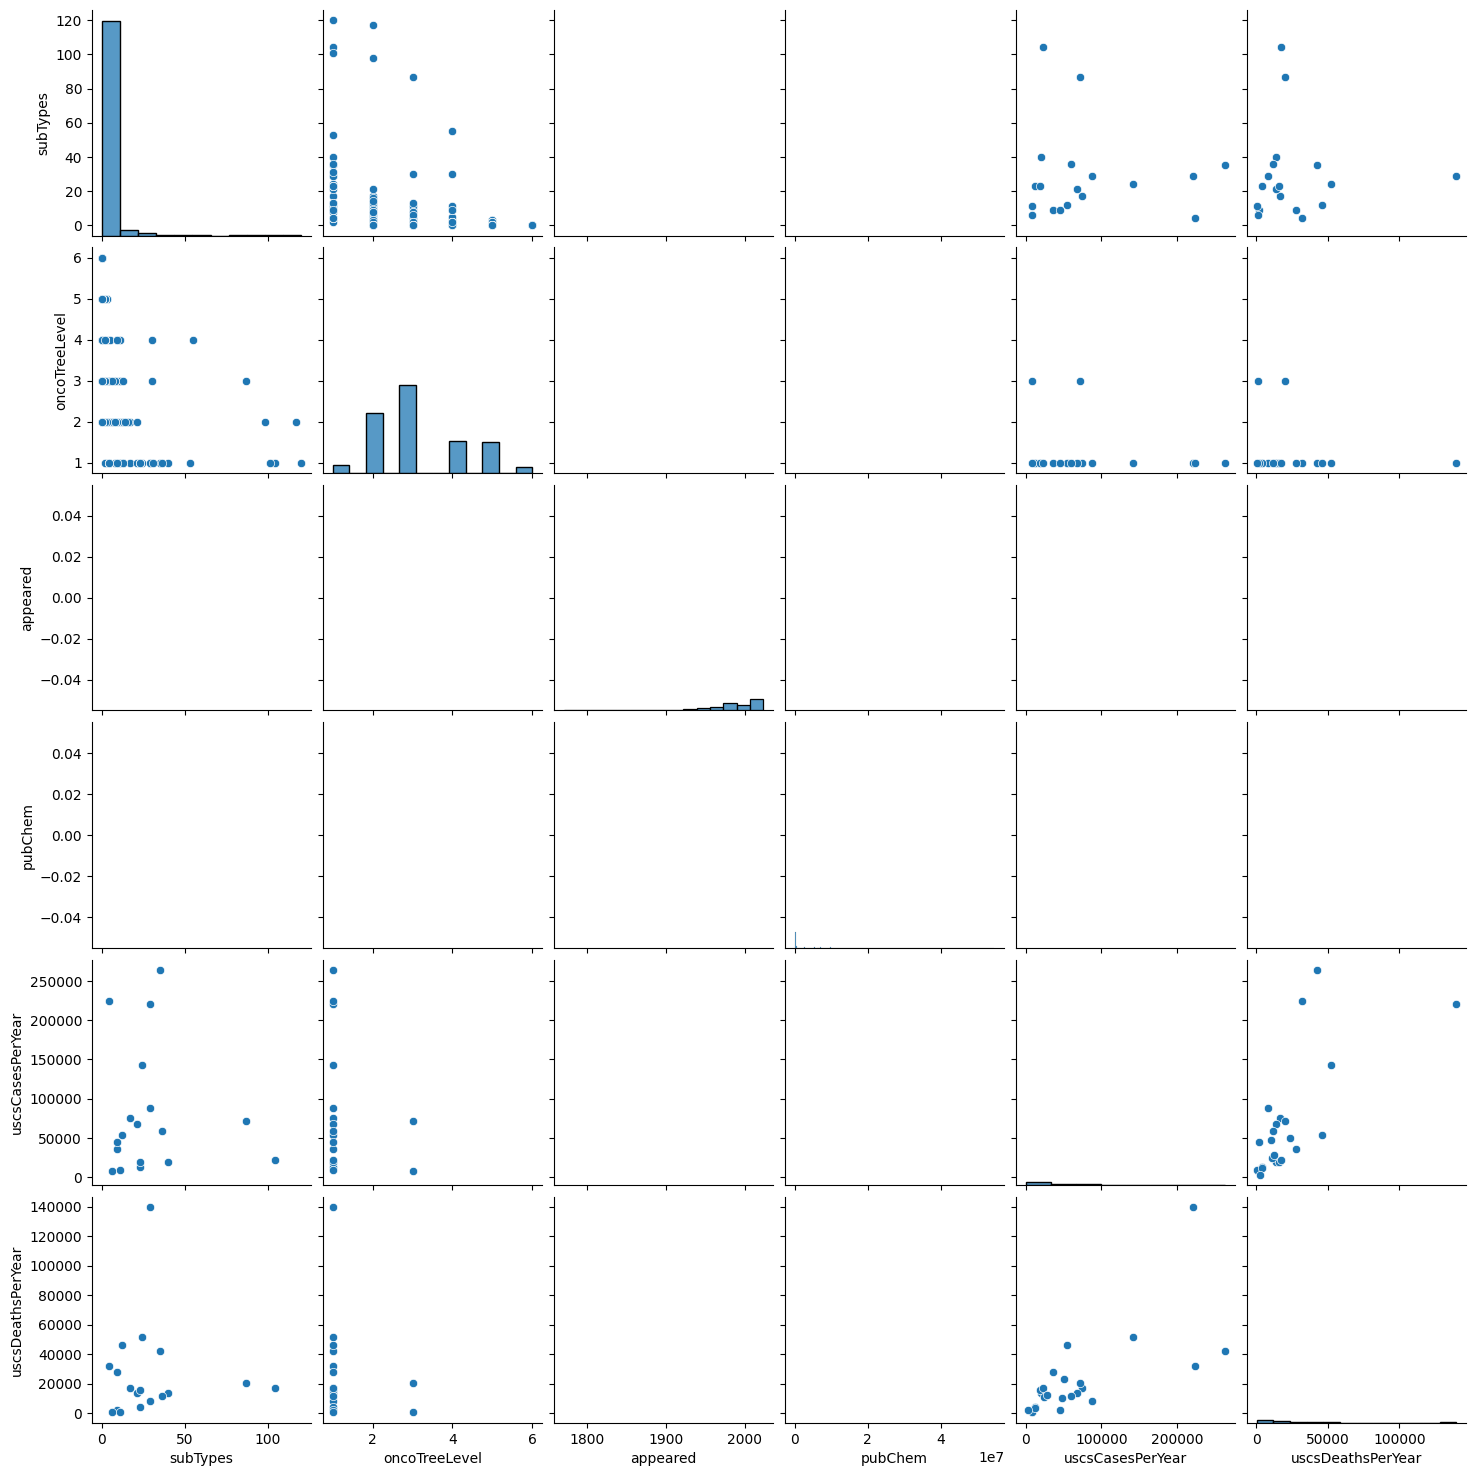

In [9]:
# impport library for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(canceranalyis_df)
plt.show()

In [ ]:
plt.figure(figsize=(15, 12))


plt.subplot(2,3,1)
sns.boxplot(x="mnth",y="cnt",data=canceranalyis_df)
plt.subplot(2,3,2)
sns.boxplot(x="yr",y="cnt",data=canceranalyis_df)
plt.subplot(2,3,3)
sns.boxplot(x="weathersit",y="cnt",data=canceranalyis_df)
plt.subplot(2,3,4)
sns.boxplot(x="workingday",y="cnt",data=canceranalyis_df)
plt.subplot(2,3,5)
sns.boxplot(x="season",y="cnt",data=canceranalyis_df)
plt.subplot(2,3,6)
sns.boxplot(x="weekday",y="cnt",data=canceranalyis_df